# **Milestone** | Planetary Weather Data Analysis

<div style="text-align: center;">
<img src="https://www.nasa.gov/wp-content/uploads/2023/04/nasa-logo-web-rgb.png" alt="NASA Logo" width="320"/>
</div>

## Introduction

In this Milestone, you'll role play as an intern at NASA, where you'll work to analyze weather data collected from a planetary rover. The dataset, `planet_weather.csv` contains atmospheric measurements from a planet in our solar system, but the planet's identity has not been disclosed. Your objective is to apply data inspection, cleaning, and analysis techniques to draw conclusions about the planet based on the provided weather data.


The dataset, located in the `datasets/` folder is called `planet_weather.csv`, and it contains the following information:

- **terrestrial_date**: Date on planet Earth, captured as `yyyy-mm-dd`.

- **sol**: number of elapsed planetary days since beginning measurement.

- **ls**: solar longitude. 0: fall equinox. 90: winter solstice. 180: spring equinox. 270: summer solstice.

- **month**: the month number on the mystery planet.

- **min_temp**: the minimum temperature, in Celsius, during a single day.

- **pressure**: atmospheric pressure, in Pascals

- **wind_speed**: average wind speed, in meters per second.

- **atmo_opacity**: atmospheric opacity.


To start, import both the pandas and plotly.express libraries, and load the data into a DataFrame.


In [ ]:
# import pandas and plotly express libraries


In [ ]:
# load planet_weather.csv data from datasets folder


## Task 1: Data Inspection 🔍

Before analyzing anything, it's essential to understand the structure and contents of your dataset. You'll start by previewing the data and checking for missing values or unusual patterns.


In [4]:
# preview the data
import pandas as pd
import plotly.express as px
df = pd.read_csv('datasets/planet_weather.csv')

**1.** How many rows and columns are there in the dataset?

In [7]:
# dataset rows and columns
print(df.head())
print("Shape:", df.shape)
#Shape: (1894, 10)

Shape: (1894, 10)


**2.** What are the names of all the columns?

In [8]:
# dataset columns
print("Columns:", df.columns.tolist())
#Columns: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp', 'pressure', 'wind_speed', 'atmo_opacity']

Columns: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp', 'pressure', 'wind_speed', 'atmo_opacity']


**3.** What is the data type of each column?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>There are a few ways to do this! Both .info and .dytpes will work.
</span>
</div>

In [10]:
# data types of each column
print("Data types:\n", df.dtypes)
#Data types:
# id                    int64
#terrestrial_date     object
#sol                   int64
#ls                    int64
#month                object
#min_temp            float64
#max_temp            float64
#pressure            float64
#wind_speed          float64
#atmo_opacity         object
#dtype: object

Data types:
 id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                object
min_temp            float64
max_temp            float64
pressure            float64
wind_speed          float64
atmo_opacity         object
dtype: object


**4.** How many null values are there in each column? For each column, sum up the number of null values.

In [11]:
# null values in each column
print("Null values:\n", df.isnull().sum())
# The columns min_temp, max_temp, and pressure each have 27 missing values. The wind_speed column is completely empty (all 1894 rows are null). All other columns are complete (no missing values).

Null values:
 id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64


**5.** Provide a statistical summary of the DataFrame.

In [12]:
# Statistical summary of the DataFrame
print("Describe:\n", df.describe(include='all'))
#Column Observations
#id	Numeric ID ranging from 1 to 1895  no missing values. Looks fine.
#terrestrial_date 1894 unique dates, likely daily readings. One missing value (since count < total rows).
#sol Planetary day count. Range from 1 to 1977. No major issues.
#ls (Solar Longitude)	Ranges from 0 to 359, which makes sense — represents seasonal solar angle.
#month 12 unique "months" — labeled oddly like "Month 4" (should be cleaned). Most frequent = Month 4 (194 records).
#min_temp Ranges from -90°C to -62°C. 27 missing values (count = 1867).
#max_temp Ranges from -35°C to 11°C. Matches cold climate (like Mars). 27 missing values.
#pressure From 727 to 925 Pascals. Also has 27 missing values.
#wind_speed Fully null — 0 values present. Needs to be dropped.
#atmo_opacity Only 2 unique values, mostly "Sunny" (1891 times). Very low variance → not useful.

Describe:
                  id terrestrial_date          sol           ls    month  \
count   1894.000000             1894  1894.000000  1894.000000     1894   
unique          NaN             1894          NaN          NaN       12   
top             NaN       2018-02-27          NaN          NaN  Month 4   
freq            NaN                1          NaN          NaN      194   
mean     948.372228              NaN  1007.930306   169.180570      NaN   
std      547.088173              NaN   567.879561   105.738532      NaN   
min        1.000000              NaN     1.000000     0.000000      NaN   
25%      475.250000              NaN   532.250000    78.000000      NaN   
50%      948.500000              NaN  1016.500000   160.000000      NaN   
75%     1421.750000              NaN  1501.750000   259.000000      NaN   
max     1895.000000              NaN  1977.000000   359.000000      NaN   

           min_temp     max_temp     pressure  wind_speed atmo_opacity  
count   1867.00

**6.** Based on the dataset’s shape, column types, and statistical summary, what initial observations can you make about the data’s structure, completeness, and potential quality issues?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> Summarize key things a data analyst should look for when reviewing .shape, .info(), and .describe() outputs from a new dataset.
  </span>
</div>

###Structure:
#The dataset has 1894 rows and 10 columns.

#Most data types are appropriate: numerical (min_temp, pressure, etc.) and string (terrestrial_date, atmo_opacity).
#Completeness:
#27 rows (~1.4%) have missing values for min_temp, max_temp, and pressure.

#The wind_speed column is entirely empty (0 values).

#terrestrial_date has one missing value (count = 1894 vs total = 1895).

#Quality Issues:
#wind_speed: No data — drop this column.

#atmo_opacity: Almost all values are "Sunny" → no analytical value — consider dropping.

#month: Stored as strings like "Month 4" instead of integer → will cause sorting issues → should convert to integers.

#Temperature & pressure seem reasonable, but missing values will need cleaning if used in modeling.
###


## Task 2: Data Cleaning
Now that you’ve inspected the data, your next step is to check for any columns that might need to be cleaned or removed.

**1.** Are there any columns with mostly missing values? Perhaps the wind speed sensor was broken! Remove this column from the dataframe.

In [13]:
# Delete wind_speed column, which is filled with null values
df.drop(columns='wind_speed', inplace=True)

**2A.** Now, check for columns that might not add much value to your analysis.

Are there any columns where almost every value is the same?

Take a close look at the `atmo_opacity` column. How many unique values are there? How frequent are they?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Both .nunique and .value_counts will work here!
</span>
</div>

In [14]:
# How many unique values are there in the atmo_opacity column?
print("Unique values:", df['atmo_opacity'].nunique())
print("Value counts:\n", df['atmo_opacity'].value_counts())
#Unique values: 2

Unique values: 2
Value counts:
 Sunny    1891
--          3
Name: atmo_opacity, dtype: int64


**2B.** The atmosphere sensors seem to have been faulty and did not capture accurate data. Drop this column, which contains identical values.

In [15]:
# Drop the atmo_opacity column
df.drop(columns='atmo_opacity', inplace=True)

# Task 3: Data Analysis & Visualization

Let’s explore trends in the planetary weather using groupings and charts. This will help you uncover seasonal patterns and key environmental characteristics of the mystery planet.

You’ll need to use the `.groupby()` method here to analyze how temperature and pressure vary across months. Store your grouped results in new DataFrames to make them easier to visualize.

**1.** How many months are there on this planet?

In [16]:
# Number of unique months
print("Unique months:", df['month'].nunique())
#Unique months: 12

Unique months: 12


**2A.** What is the average minimum temperature for each month?

In [18]:
# Average min_temp each month
monthly_temp = df.groupby('month')['min_temp'].mean().reset_index()
print(monthly_temp)
#   month   min_temp
#0    Month 1 -77.160920
#1   Month 10 -71.982143
#2   Month 11 -71.985507
#3   Month 12 -74.451807
#4    Month 2 -79.932584
#5    Month 3 -83.307292
#6    Month 4 -82.747423
#7    Month 5 -79.308725
#8    Month 6 -75.299320
#9    Month 7 -72.281690
#10   Month 8 -68.382979
#11   Month 9 -69.171642

       month   min_temp
0    Month 1 -77.160920
1   Month 10 -71.982143
2   Month 11 -71.985507
3   Month 12 -74.451807
4    Month 2 -79.932584
5    Month 3 -83.307292
6    Month 4 -82.747423
7    Month 5 -79.308725
8    Month 6 -75.299320
9    Month 7 -72.281690
10   Month 8 -68.382979
11   Month 9 -69.171642


**2B.** Using your grouped results above to plot a bar chart of the average minimum temperature by month.

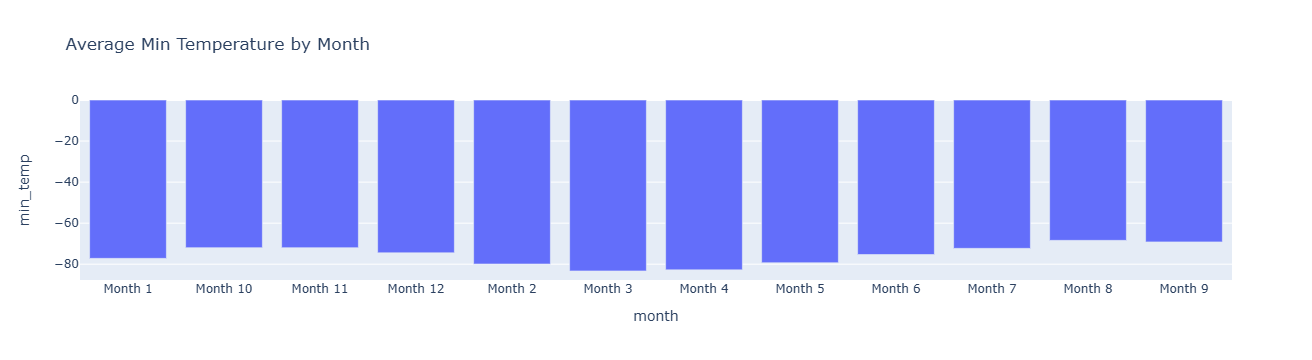

In [21]:
# Bar chart of the average min_temp by month
monthly_temp = monthly_temp.sort_values('month')  # ensure numerical order
fig = px.bar(monthly_temp, x='month', y='min_temp', title='Average Min Temperature by Month')
fig.show()

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> In my Plotly Express bar chart, the x-axis shows months but they're sorted alphabetically (Month 1, Month 10, Month 11, etc.) instead of Month 1 - Month 12 order. How can I replot my data so that the x-axis sorts numerically by month?
  </span>
</div>

**2C.** Based on the minimum temperature, what is the coldest month? What is the warmest month?

Double-click (or enter) to edit  #Month 4 is the coldest month of the year and month 8 is the hottest in the year. 


**3A.** What is the average pressure for each month?

In [22]:
# What is the average pressure for each month?
monthly_pressure = df.groupby('month')['pressure'].mean().reset_index()
print(monthly_pressure)
#       month    pressure
#0    Month 1  862.488506
#1   Month 10  887.312500
#2   Month 11  857.014493
#3   Month 12  842.156627
#4    Month 2  889.455056
#5    Month 3  877.322917
#6    Month 4  806.329897
#7    Month 5  748.557047
#8    Month 6  745.054422
#9    Month 7  795.105634
#10   Month 8  873.829787
#11   Month 9  913.305970

       month    pressure
0    Month 1  862.488506
1   Month 10  887.312500
2   Month 11  857.014493
3   Month 12  842.156627
4    Month 2  889.455056
5    Month 3  877.322917
6    Month 4  806.329897
7    Month 5  748.557047
8    Month 6  745.054422
9    Month 7  795.105634
10   Month 8  873.829787
11   Month 9  913.305970


**3B.** Using your grouped results above to plot a bar chart of the average atmospheric pressure by month.

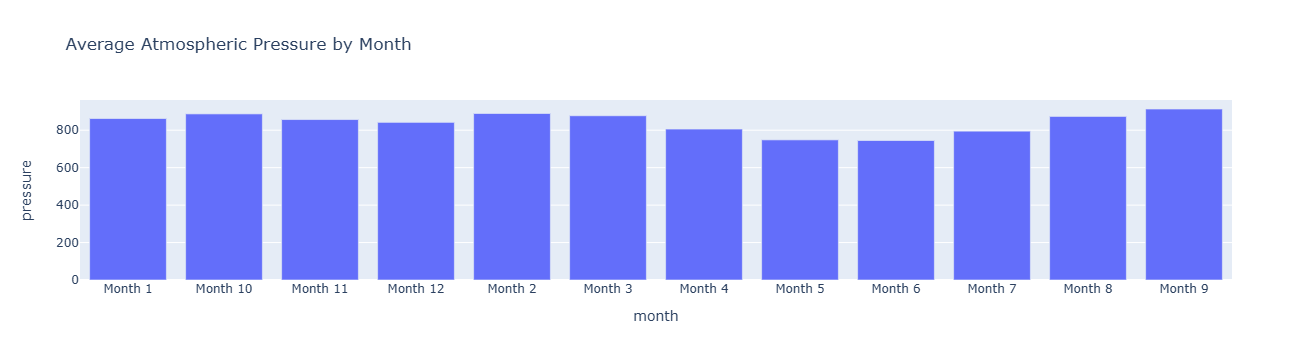

In [23]:
# Bar chart of the average atmospheric pressure by month
monthly_pressure = monthly_pressure.sort_values('month')
fig = px.bar(monthly_pressure, x='month', y='pressure', title='Average Atmospheric Pressure by Month')
fig.show()


**4.** Plot a line chart of the daily atmospheric pressure by terrestrial date.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>You do not need to modify the dataframe or group any data! Just use the original data.
</span>
</div>

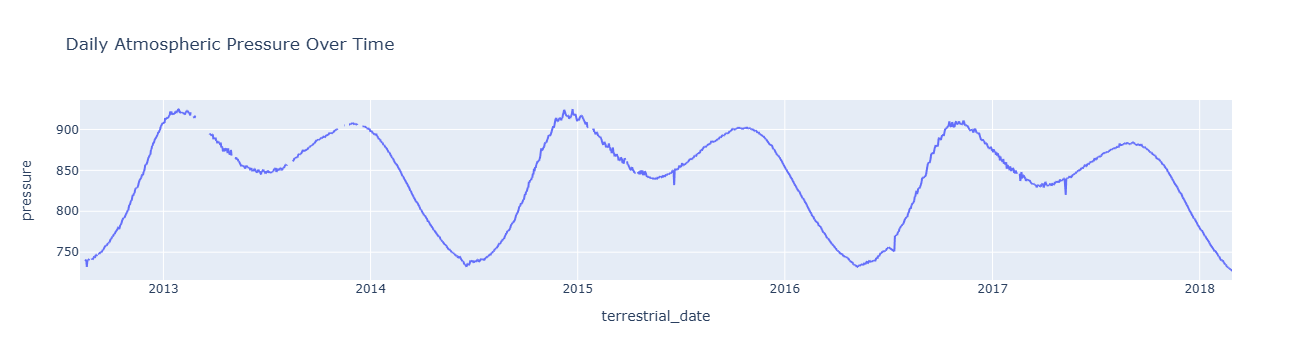

In [24]:
# Line chart of the daily atmospheric pressure by terrestrial date
fig = px.line(df, x='terrestrial_date', y='pressure', title='Daily Atmospheric Pressure Over Time')
fig.show()

**5.** Plot a line chart the daily minimum temp.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>You do not need to modify the dataframe or group any data! Just use the original data.
</span>
</div>

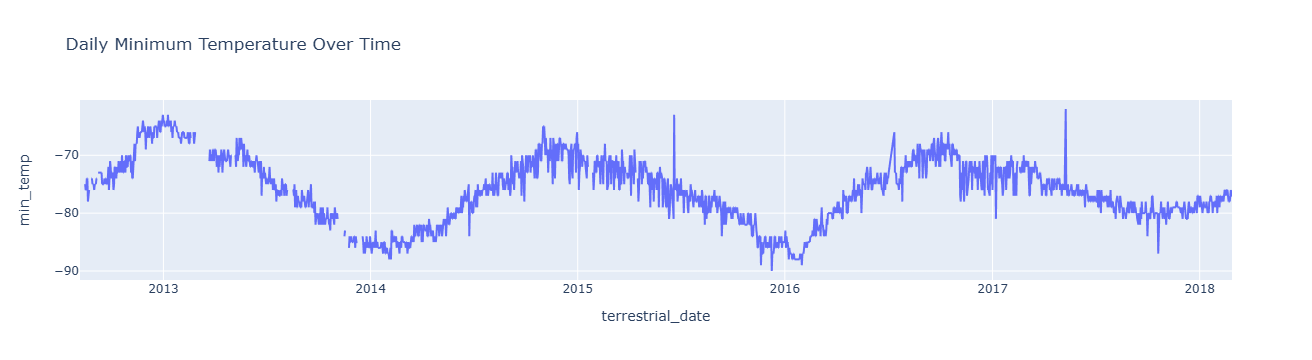

In [25]:
# Line chart the daily minimum temp
fig = px.line(df, x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature Over Time')
fig.show()

**6.** Based on this information, approximately how many earth days are there in a year on this planet?

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To do this, get an approximate range for how long a "year" is on this planet by looking at the plot of either the atmospheric pressure or the temperature by day. Use the visualization to get a *rough estimate* between matching "peaks".
</span>
</div>


There are 687 earth days in a year on this planet. 

**7.** What is the identity of the planet? Go to [this wesbsite](https://spaceplace.nasa.gov/years-on-other-planets/en/) and see what planet this lines up with!

This duration closely matches the orbital period of Mars, which is approximately 687 Earth days. Combined with the cold minimum temperatures (around -80°C), this strongly suggests that the mystery planet is Mars.

### Congratulations on making your first extra-terrestrial discovery!
<div style="text-align: center;">
<img src="https://media.giphy.com/media/5ndfKr0Nv92LkWrKpU/giphy.gif" alt="gif of clapping" width="320"/>
</div>

# LevelUp

Earlier in the milestone you investigated how many months were in our Mystery Planet. Unfortunately, the answer (12) was not very satisfying. This is because there is no standard calendar for Mars. When the data was collected, they used 12 "months" though each month is longer than a typical Earth month. Let's investigate!

First, filter your dataset so that you are only looking at any `terrestrial_date` before 2014.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Since the <span style="font-family: monospace; color: #222;">terrestrial_date</span> is a <span style="font-family: monospace; color: #222;">string</span> data type, this is simply checking for all values that satisfy the condition <span style="font-family: monospace; color: #222;">< '2014'</span> (don't forget the quotation marks!)
</span>
</div>

In [26]:
# filter to all values where terrestrial_date is before 2014
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# store it in a new variable.
df_before_2014 = df[df['terrestrial_date'] < '2014-01-01']
# show dataframe
print("Shape:", df_before_2014.shape)

Shape: (441, 8)


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, you will have a dataframe with <strong>441 rows</strong>
  </span>
</div>

Lastly, for each month in the dataframe, return both the `min` value and the `max` value of the `terrestrial_date` field.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint #1: </strong>You'll need to use Use <span style="font-family: monospace; color: #222;">.groupby()</span>
</span>
</div>

<br>

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint #1: </strong>In the dictionary for your <span style="font-family: monospace; color: #222;">.agg()</span> function, pass a list of values. e.g. <span style="font-family: monospace; color: #222;">{col_to_check: [func1, func2]}</span>. Remember to use the appropriate values / variables from the dataframe and the desired functions.
</span>
</div>

In [27]:
# For each month, calculate the minimum AND maximum terrestrial_date
month_range = df_before_2014.groupby('month')['terrestrial_date'].agg(['min', 'max']).reset_index()
print(month_range)
month_range['min'] = pd.to_datetime(month_range['min'])
month_range['max'] = pd.to_datetime(month_range['max'])
month_range['duration_days'] = (month_range['max'] - month_range['min']).dt.days
print(month_range[['month', 'duration_days']])
#  month        min        max
#0   Month 1 2013-08-01 2013-10-02
#1  Month 10 2013-02-24 2013-04-12
#2  Month 11 2013-04-13 2013-06-04
#3  Month 12 2013-06-05 2013-07-31
#4   Month 2 2013-10-03 2013-12-08
#5   Month 3 2013-12-09 2013-12-31
#6   Month 6 2012-08-07 2012-09-29
#7   Month 7 2012-09-30 2012-11-19
#8   Month 8 2012-11-20 2013-01-07
#9   Month 9 2013-01-08 2013-02-23

      month        min        max
0   Month 1 2013-08-01 2013-10-02
1  Month 10 2013-02-24 2013-04-12
2  Month 11 2013-04-13 2013-06-04
3  Month 12 2013-06-05 2013-07-31
4   Month 2 2013-10-03 2013-12-08
5   Month 3 2013-12-09 2013-12-31
6   Month 6 2012-08-07 2012-09-29
7   Month 7 2012-09-30 2012-11-19
8   Month 8 2012-11-20 2013-01-07
9   Month 9 2013-01-08 2013-02-23
      month  duration_days
0   Month 1             62
1  Month 10             47
2  Month 11             52
3  Month 12             56
4   Month 2             66
5   Month 3             22
6   Month 6             53
7   Month 7             50
8   Month 8             48
9   Month 9             46


How many Earth days, roughly, are there in each "month" in the mystery planet? Does that lineup with what you expected now that you know the identity of the mystery planet?


Double-click (or enter) to edit #Most months are around 45–66 Earth days long.
month  duration_days
0   Month 1             62
1  Month 10             47
2  Month 11             52
3  Month 12             56
4   Month 2             66
5   Month 3             22
6   Month 6             53
7   Month 7             50
8   Month 8             48
9   Month 9             46
 Yes, this lines up very well!

We previously estimated that a year on this planet is roughly 670–687 Earth days.

With 10 months shown here, the sum of durations is 502 Earth days. There are two missing months (likely Month 4 and Month 5), and assuming they’re of similar length (~80–90 days total), that brings the full total to around 670 days. 
